<h1>Hey there fellow kagglers! Here's one for y'all. </h1>
This notebook is meant to serve as a begginer tutorial for people trying to break into ML and data science. Our goal is multifold- to understand the problem, the data,the problem statement, and the solution. Trust me, it's super easy :D 

<h1> Our Methodology </h1>
Truth be told, Machine Learning is only a small part of the problem. When working with real-life data, you'll have to spend most of your time doing "other" things that'll help you out with improving the data. All of this might sound confusing as a beginner, so I'm going to lay a simple methodology that you can follow for almost any ML/Data Science project -

- Understand the problem - You're a problem solver, and hence your first priority should be to understand the problem to the best of your ability


- Explore the dataset - More often than not, you'll find multiple discrepencies within the dataset. Incomplete rows/columns, numbers that don't match up, etc., and it is your responsibily as a kaggler to solve these discrepencies. You'll also have to add/delete/manipulate entire columns as per need


- Apply different algorithms - Once you're confident with your data, you'll have to experiment with different Machine Learning algorithms to get the best result. Sometimes you might even end up using two or more algorithms at once !



In this tutorial I'll attempt to go through all of the above steps to give you a concise understanding of the above methodology

<h1>Step one- understand the problem</h1>
<h2>Polycystic ovary syndrome (PCOS)</h2> PCOS is a hormonal disorder common among women of reproductive age. Women with PCOS may have infrequent or prolonged menstrual periods or excess male hormone (androgen) levels. The ovaries may develop numerous small collections of fluid (follicles) and fail to regularly release eggs.
<img src = 'https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/08/26/10/42/ds00423_im04151_mcdc7_polycystic_ovarythu_jpg.jpg'>


Complications of PCOS can include:

- Infertility 

- Gestational diabetes or pregnancy-induced high blood pressure

- Miscarriage or premature birth

- Nonalcoholic steatohepatitis — a severe liver inflammation caused by fat accumulation in the liver

- Metabolic syndrome — a cluster of conditions including high blood pressure, high blood sugar, and abnormal cholesterol or triglyceride levels that significantly increase your risk of cardiovascular disease

- Type 2 diabetes or prediabetes

- Sleep apnea

- Depression, anxiety and eating disorders

- Abnormal uterine bleeding

- Cancer of the uterine lining (endometrial cancer)




**Now that we know all about the disease, we can finally define the problem statement** - <h1>"Using the provided dataset, devise a way to predict PCOS(Polycystic Ovary Syndrome) for a given paitient" </h1>

<h2> Quick glance at the data </h2>


In [43]:
!pip install openpyxl 
import openpyxl #allows us to read excel files
import pandas as pd #perhaps the most powerful and easy-to-understand data organization and visusalisation library in python. We'll be using it frequently from here on
data = pd.read_excel('../input/polycystic-ovary-syndrome-pcos/PCOS_data_without_infertility.xlsx', sheet_name=1)# loads the data and creates a table(formally called a pandas DataFrame) 

data.head(10) #shows us the first ten rows of the DataFrame

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN
5,6.0,6.0,0.0,36.0,74.1,165.0,27.217631,15.0,78.0,28.0,...,0.0,0.0,110.0,70.0,9.0,6.0,16.0,20.0,8.0,NaN
6,7.0,7.0,0.0,34.0,64.0,156.0,26.298488,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,6.0,6.0,15.0,16.0,6.8,NaN
7,8.0,8.0,0.0,33.0,58.5,159.0,23.139907,13.0,72.0,20.0,...,0.0,0.0,120.0,80.0,7.0,6.0,15.0,18.0,7.1,NaN
8,9.0,9.0,0.0,32.0,40.0,158.0,16.023073,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,5.0,7.0,17.0,17.0,4.2,NaN
9,10.0,10.0,0.0,36.0,52.0,150.0,23.111111,15.0,80.0,20.0,...,0.0,0.0,110.0,80.0,1.0,1.0,14.0,17.0,2.5,NaN


In [44]:
#let us load the infertility table too
data_inf = pd.read_csv('../input/polycystic-ovary-syndrome-pcos/PCOS_infertility.csv')
data_inf.head(10)

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
5,6,10006,0,237.97,1.99,6.74
6,7,10007,0,1.99,1.99,3.05
7,8,10008,0,100.51,100.51,1.54
8,9,10009,0,1.99,1.99,1
9,10,10010,0,1.99,1.99,1.61


On a quick glance, we observe the following :
- PCOS_data_with_infertibility and PCOS_infertility has 45 columns and 6 columns each, with PCOS being the target column (the one we're trying to predict)
- The PCOS column has two values - 0 for no symptoms and 1 for a confirmed diagnosis
- There also happens to be a numbering disparity between the two dataframes in 'Paitient File No.' which we'll have to fix
Now that we've been aqquainted with the data, the only thing that's left is to clean and analyse the data


<h1>Step two- Exploratory Data Analysis</h1>

In [45]:
#before we start, let's fix Paitient File no.
data['Patient File No.'] = data['Patient File No.'].apply(lambda x:  x+10000).astype('int64')

In [4]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,10001,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,10002,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,10003,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,10004,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,10005,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN


In [46]:
#let's merge data and data_inf
data = pd.merge(data,data_inf[['Patient File No.','  I   beta-HCG(mIU/mL)','II    beta-HCG(mIU/mL)']], on='Patient File No.', how='left')

In [6]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44,I beta-HCG(mIU/mL)_y,II beta-HCG(mIU/mL)_y
0,1.0,10001,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN,1.99,1.99
1,2.0,10002,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN,60.80,1.99
2,3.0,10003,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN,494.08,494.08
3,4.0,10004,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN,1.99,1.99
4,5.0,10005,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN,801.45,801.45


In [7]:
#now let's start by dealing with empty values
#IMPORTANT: 0 IS NOT an empty value. only NaN is considered as a null (or empty) value
pd.isnull(data).sum()

Sl. No                        0
Patient File No.              0
PCOS (Y/N)                    0
 Age (yrs)                    0
Weight (Kg)                   0
Height(Cm)                    0
BMI                           0
Blood Group                   0
Pulse rate(bpm)               0
RR (breaths/min)              0
Hb(g/dl)                      0
Cycle(R/I)                    0
Cycle length(days)            0
Marraige Status (Yrs)         1
Pregnant(Y/N)                 0
No. of aborptions             0
  I   beta-HCG(mIU/mL)_x      0
II    beta-HCG(mIU/mL)_x      0
FSH(mIU/mL)                   0
LH(mIU/mL)                    0
FSH/LH                        0
Hip(inch)                     0
Waist(inch)                   0
Waist:Hip Ratio               0
TSH (mIU/L)                   0
AMH(ng/mL)                    0
PRL(ng/mL)                    0
Vit D3 (ng/mL)                0
PRG(ng/mL)                    0
RBS(mg/dl)                    0
Weight gain(Y/N)              0
hair gro

539 missing values?! We really can't use the column now can we? So let's delete it. We can also deal with other values by filling them with zero


In [47]:
del data['Unnamed: 44']
data['Marraige Status (Yrs)'].fillna(0,inplace = True)
data['Fast food (Y/N)'].fillna(0,inplace = True)

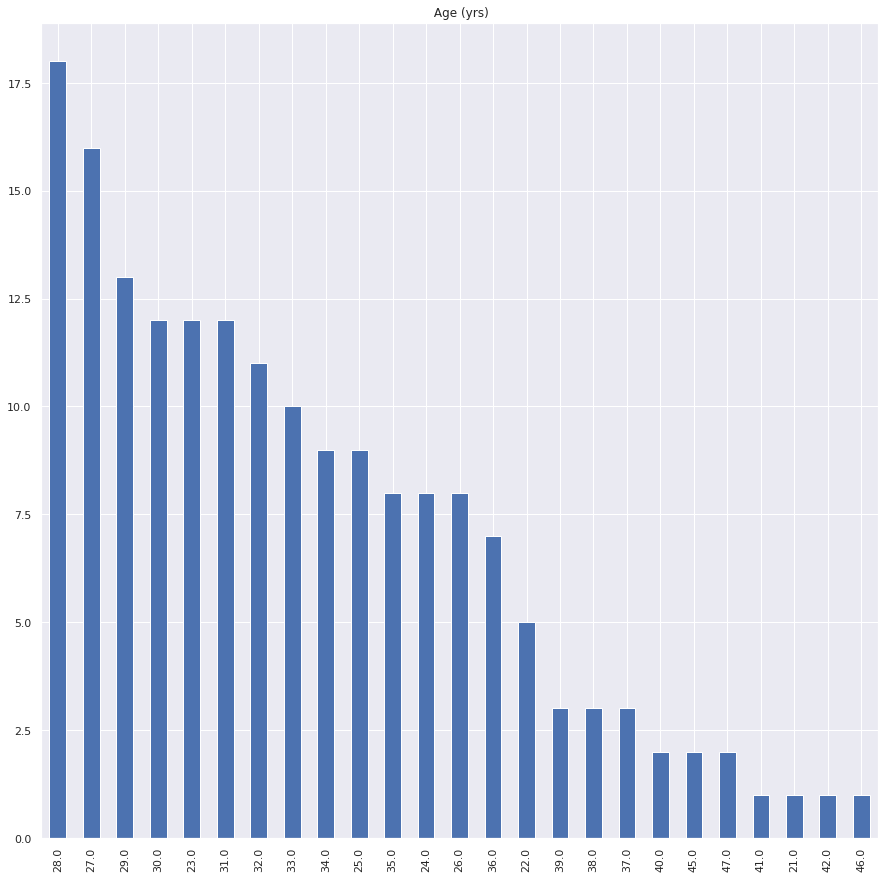

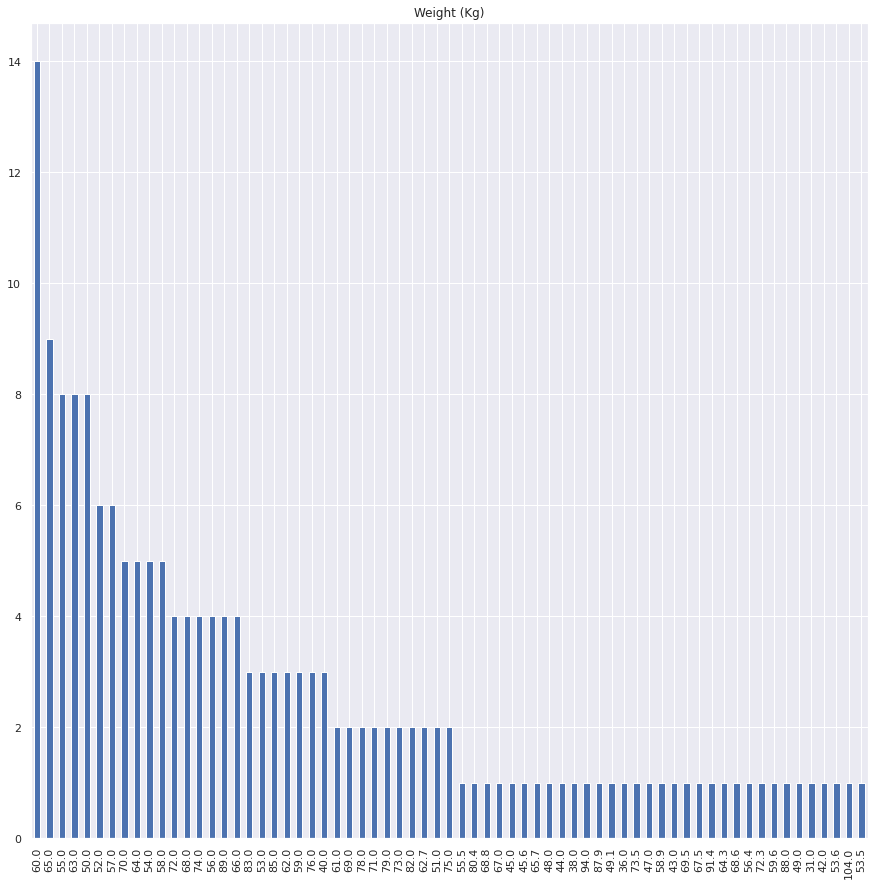

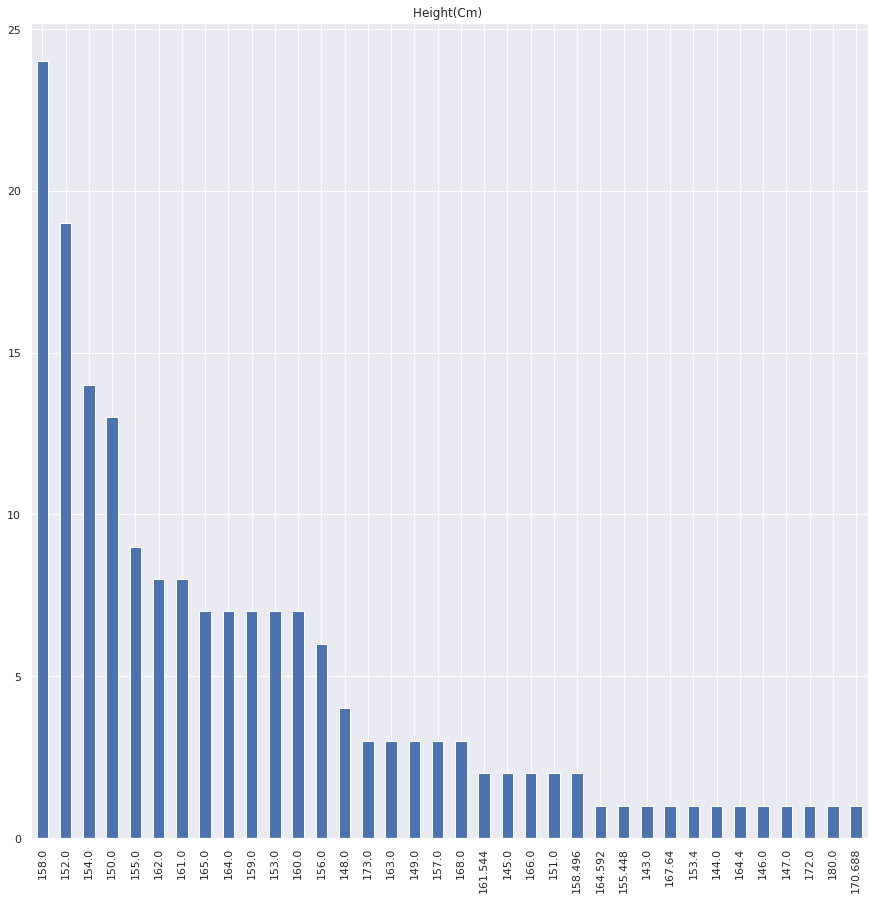

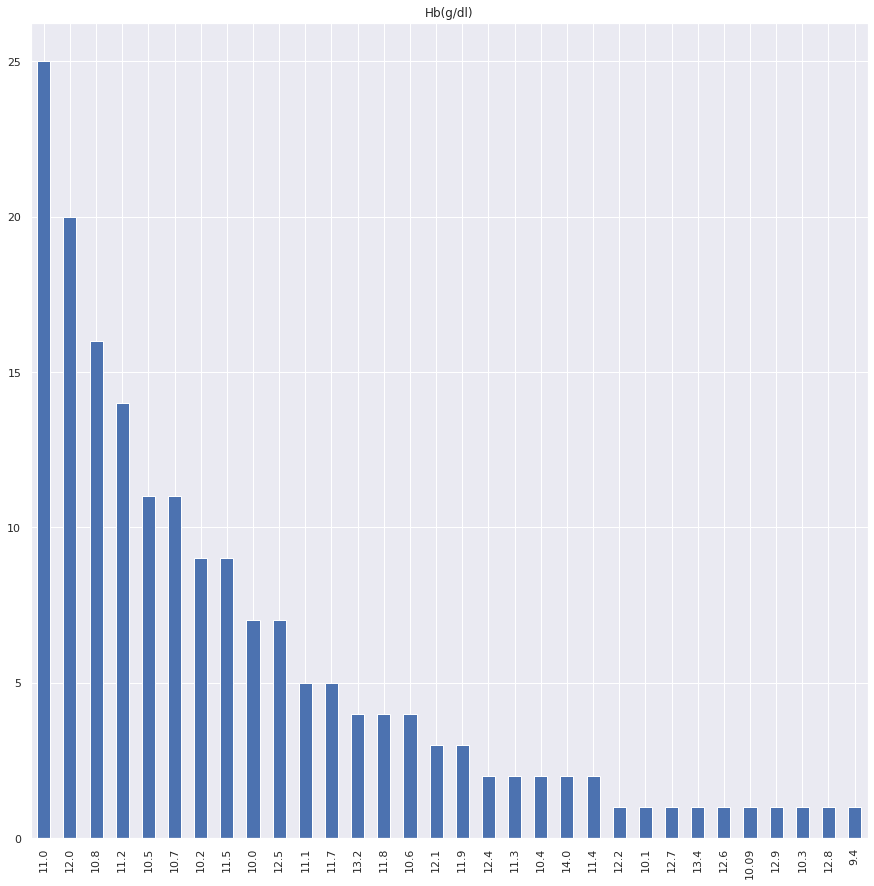

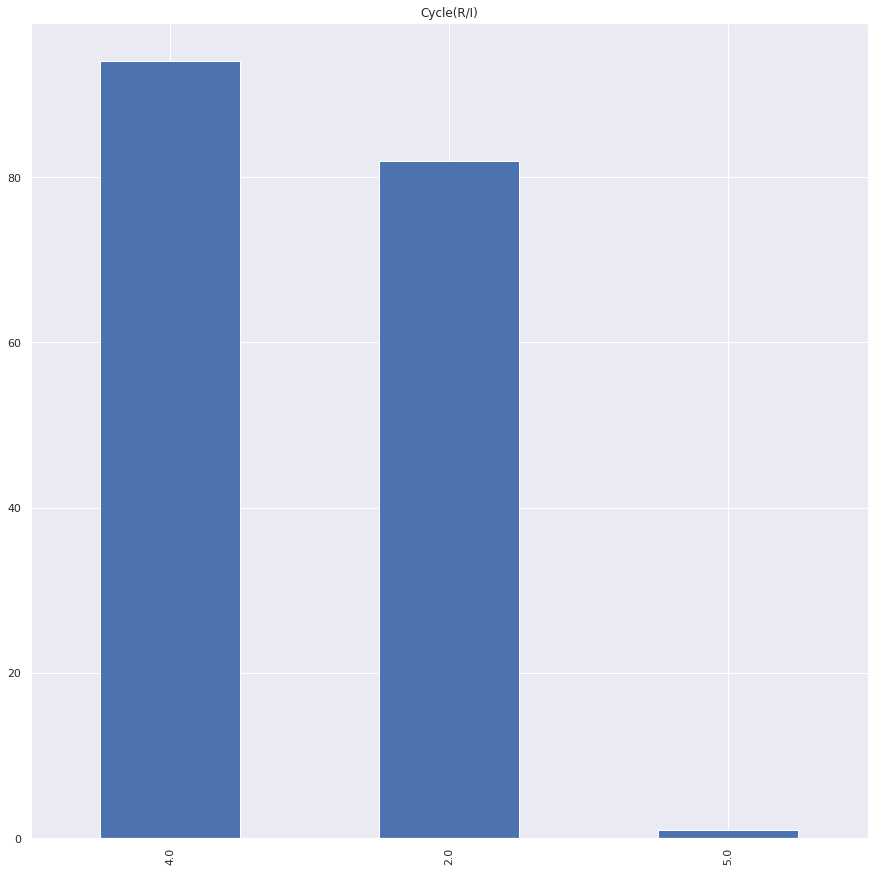

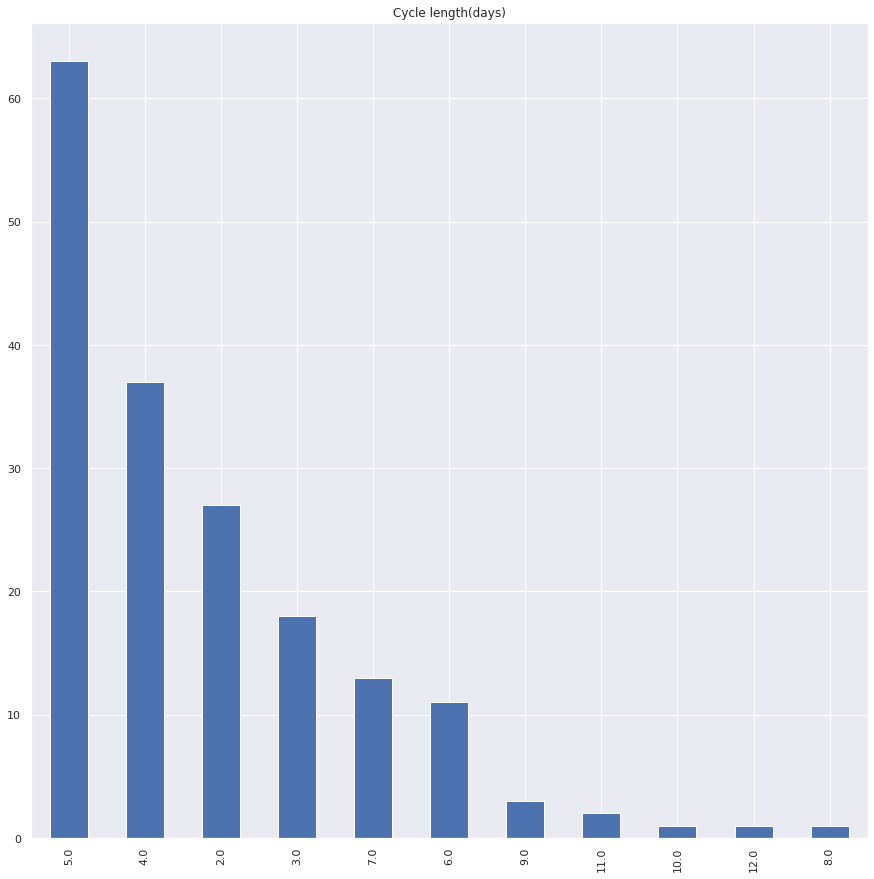

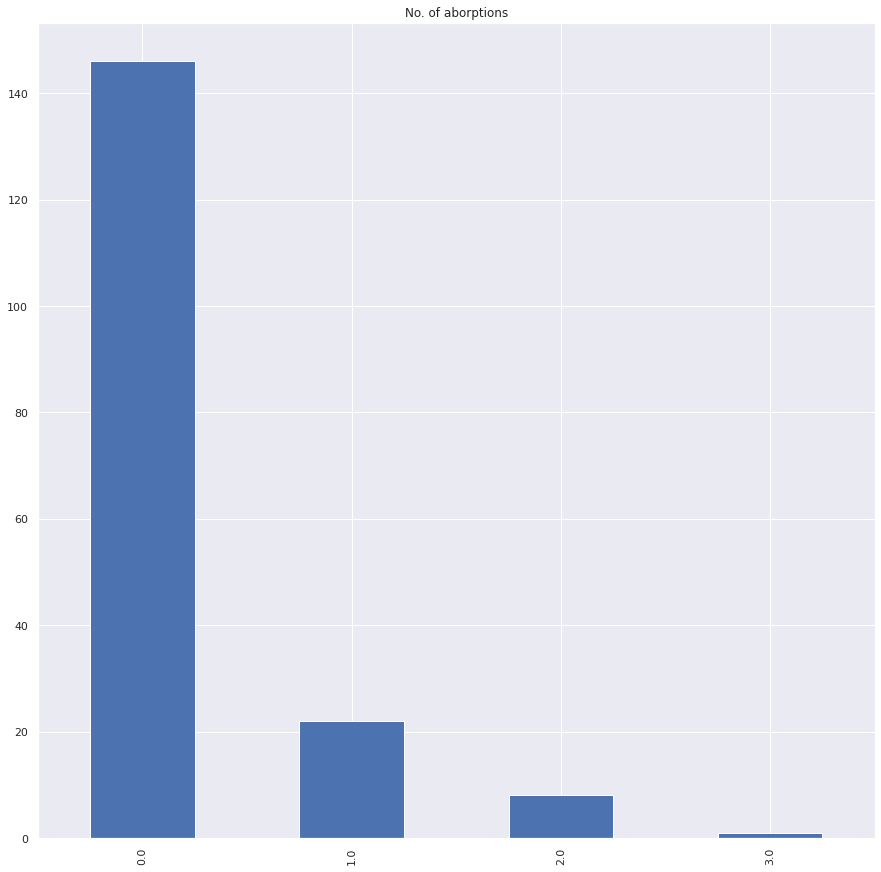

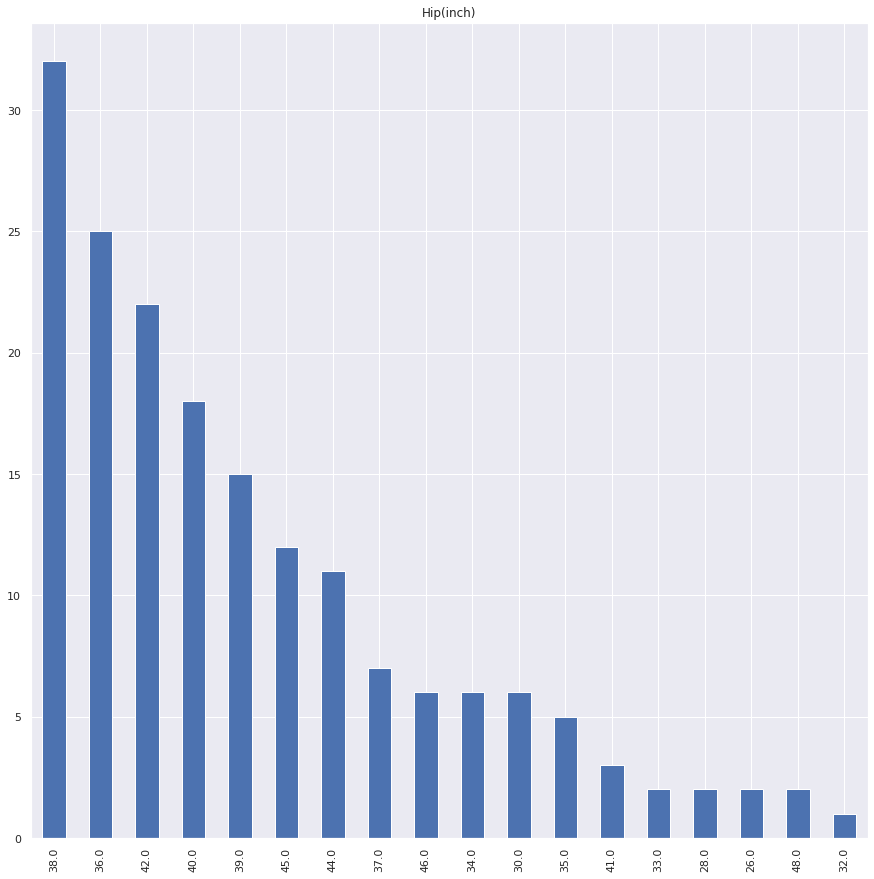

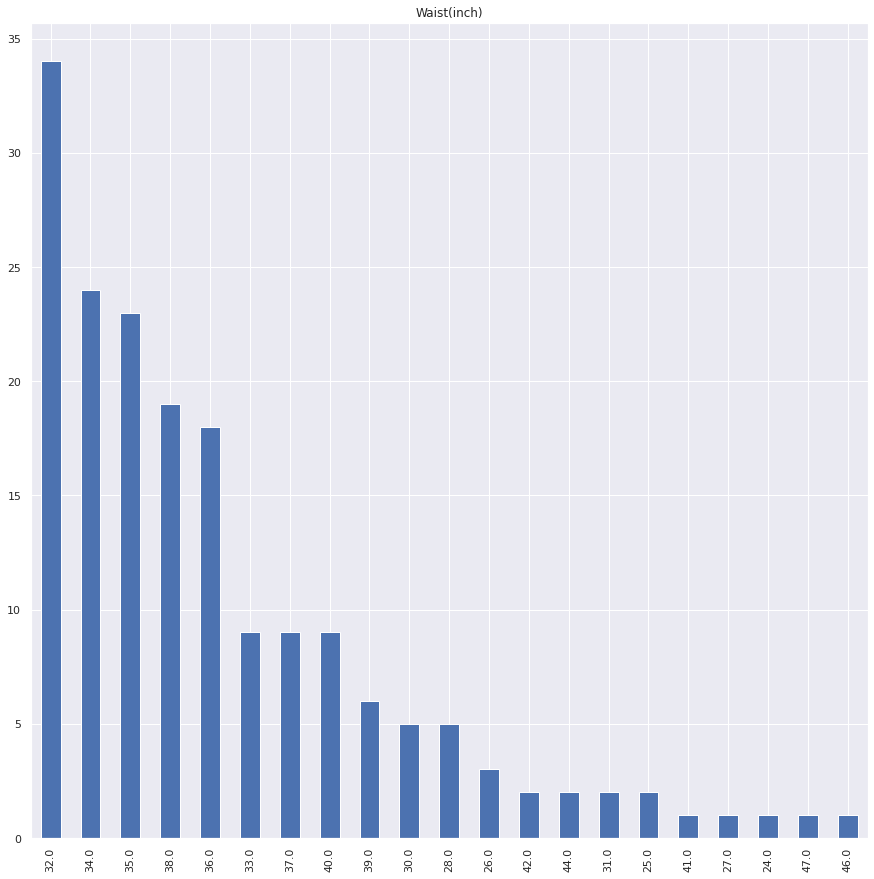

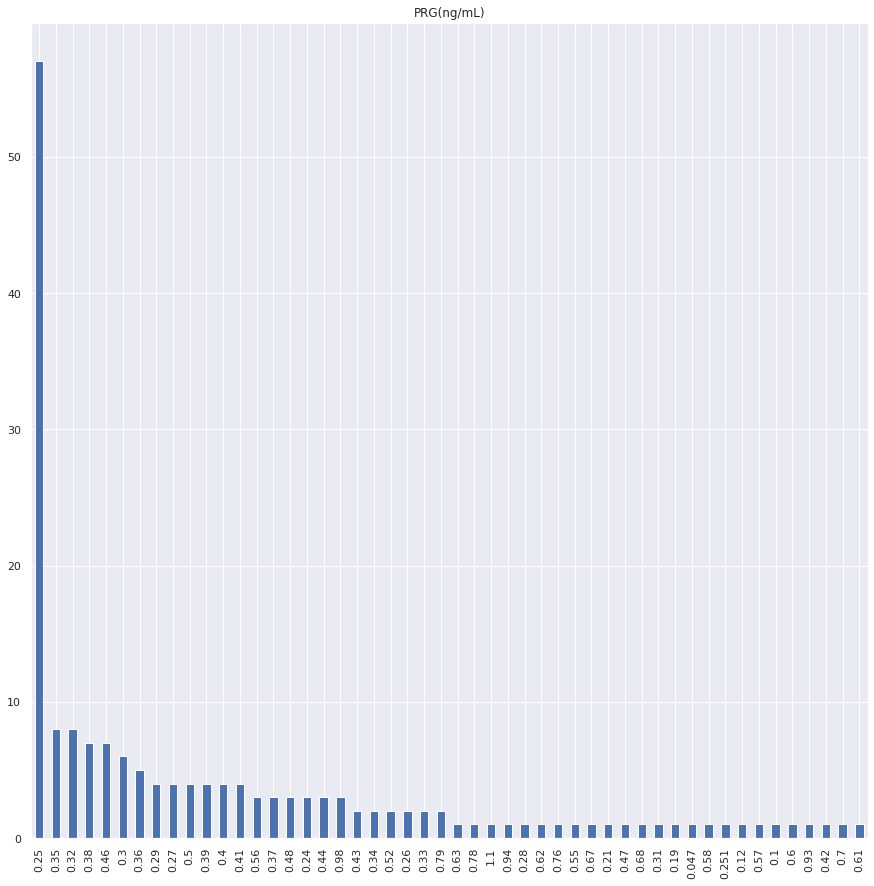

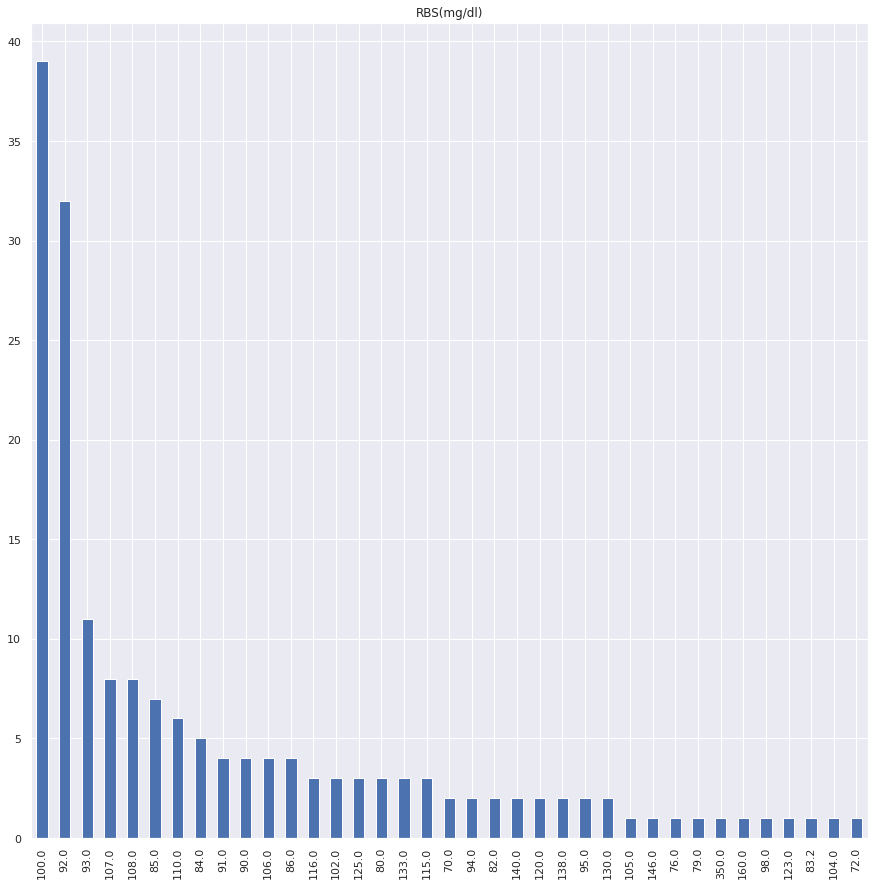

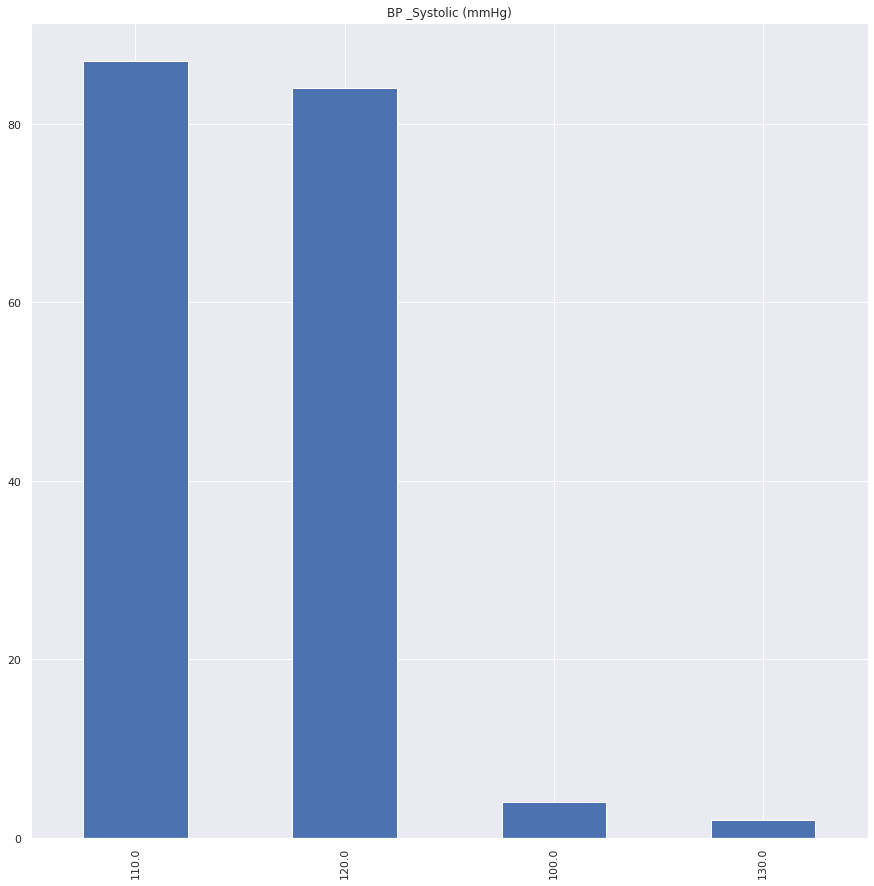

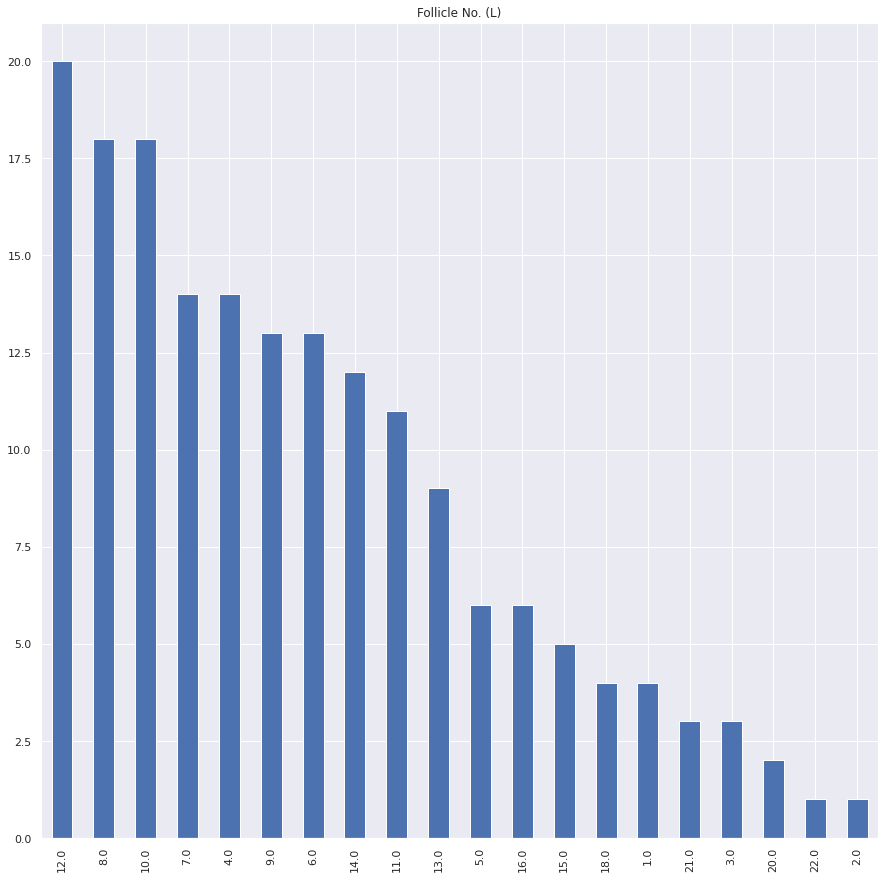

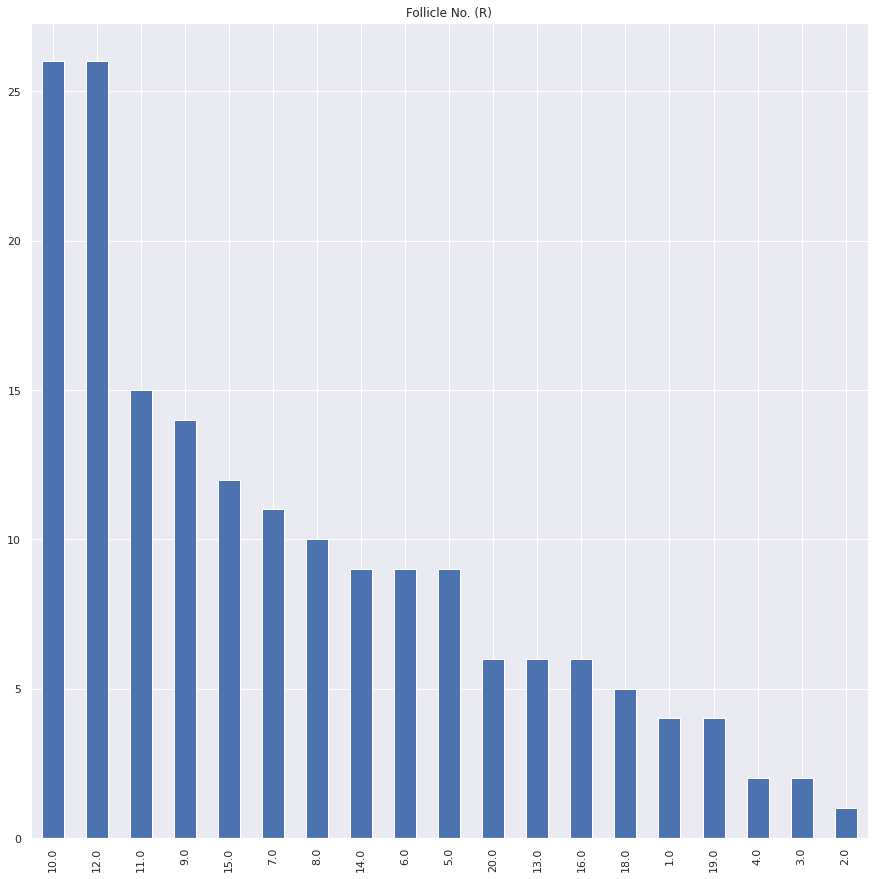

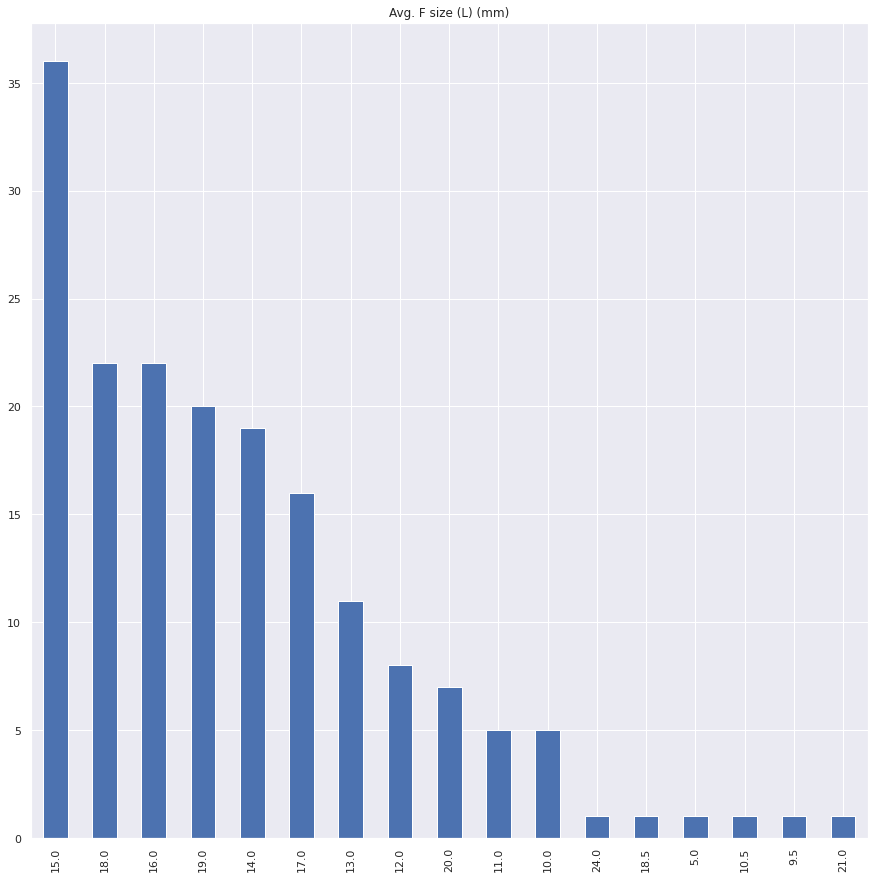

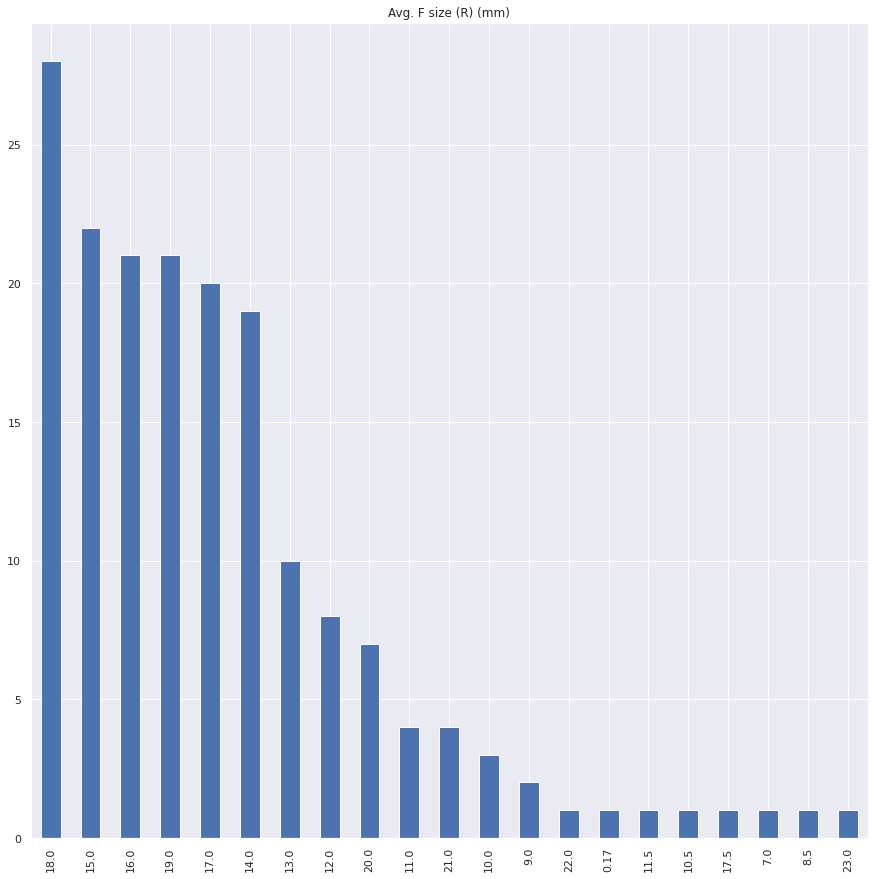

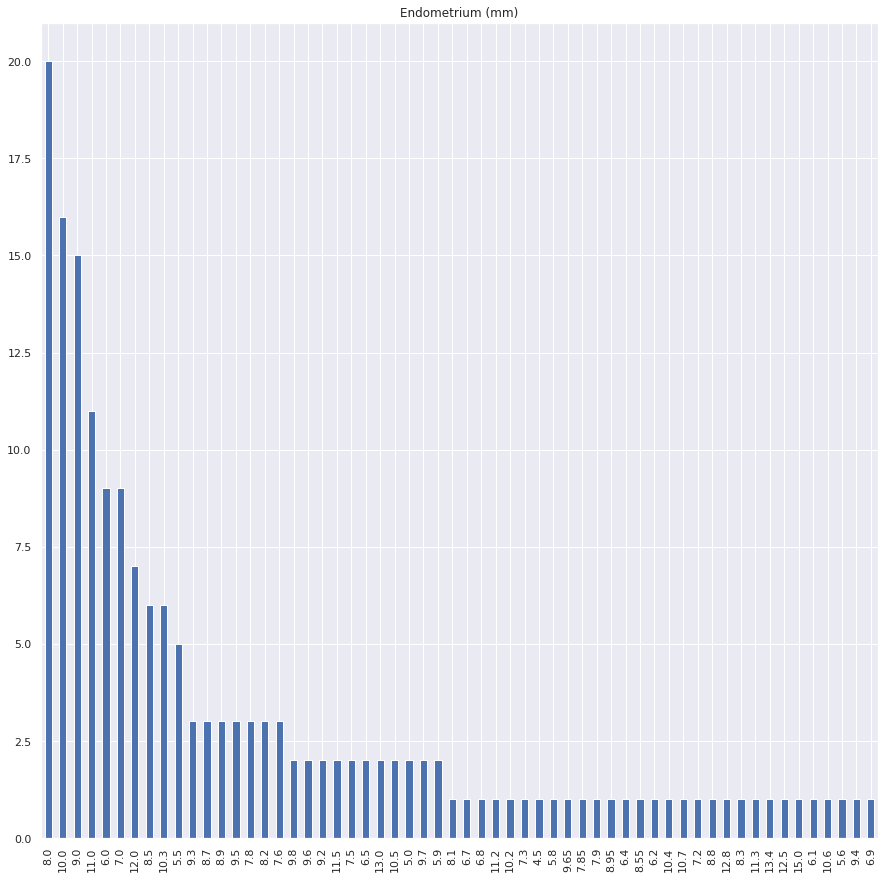

In [9]:
#now that that's done, let us try to get a little more intimate with the data
import matplotlib.pyplot as plt #for plotting simple graphs
import seaborn as sns #another plotting library
for i in [' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'No. of aborptions',
        'Hip(inch)', 'Waist(inch)', 
       'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']:
  sns.set(rc = {'figure.figsize':(15,15)})
  data[data['PCOS (Y/N)'] == 1][i].value_counts().plot.bar()
  plt.title(i)
  plt.show()

we can already observe an interesting relationship between all subsequent columns. If you observe closely, it looks like the middle values of the X-cordinate seem to have the highest values in the y-coordinate. But this still isn't very comprehensible enough, so let us use a different plot. 

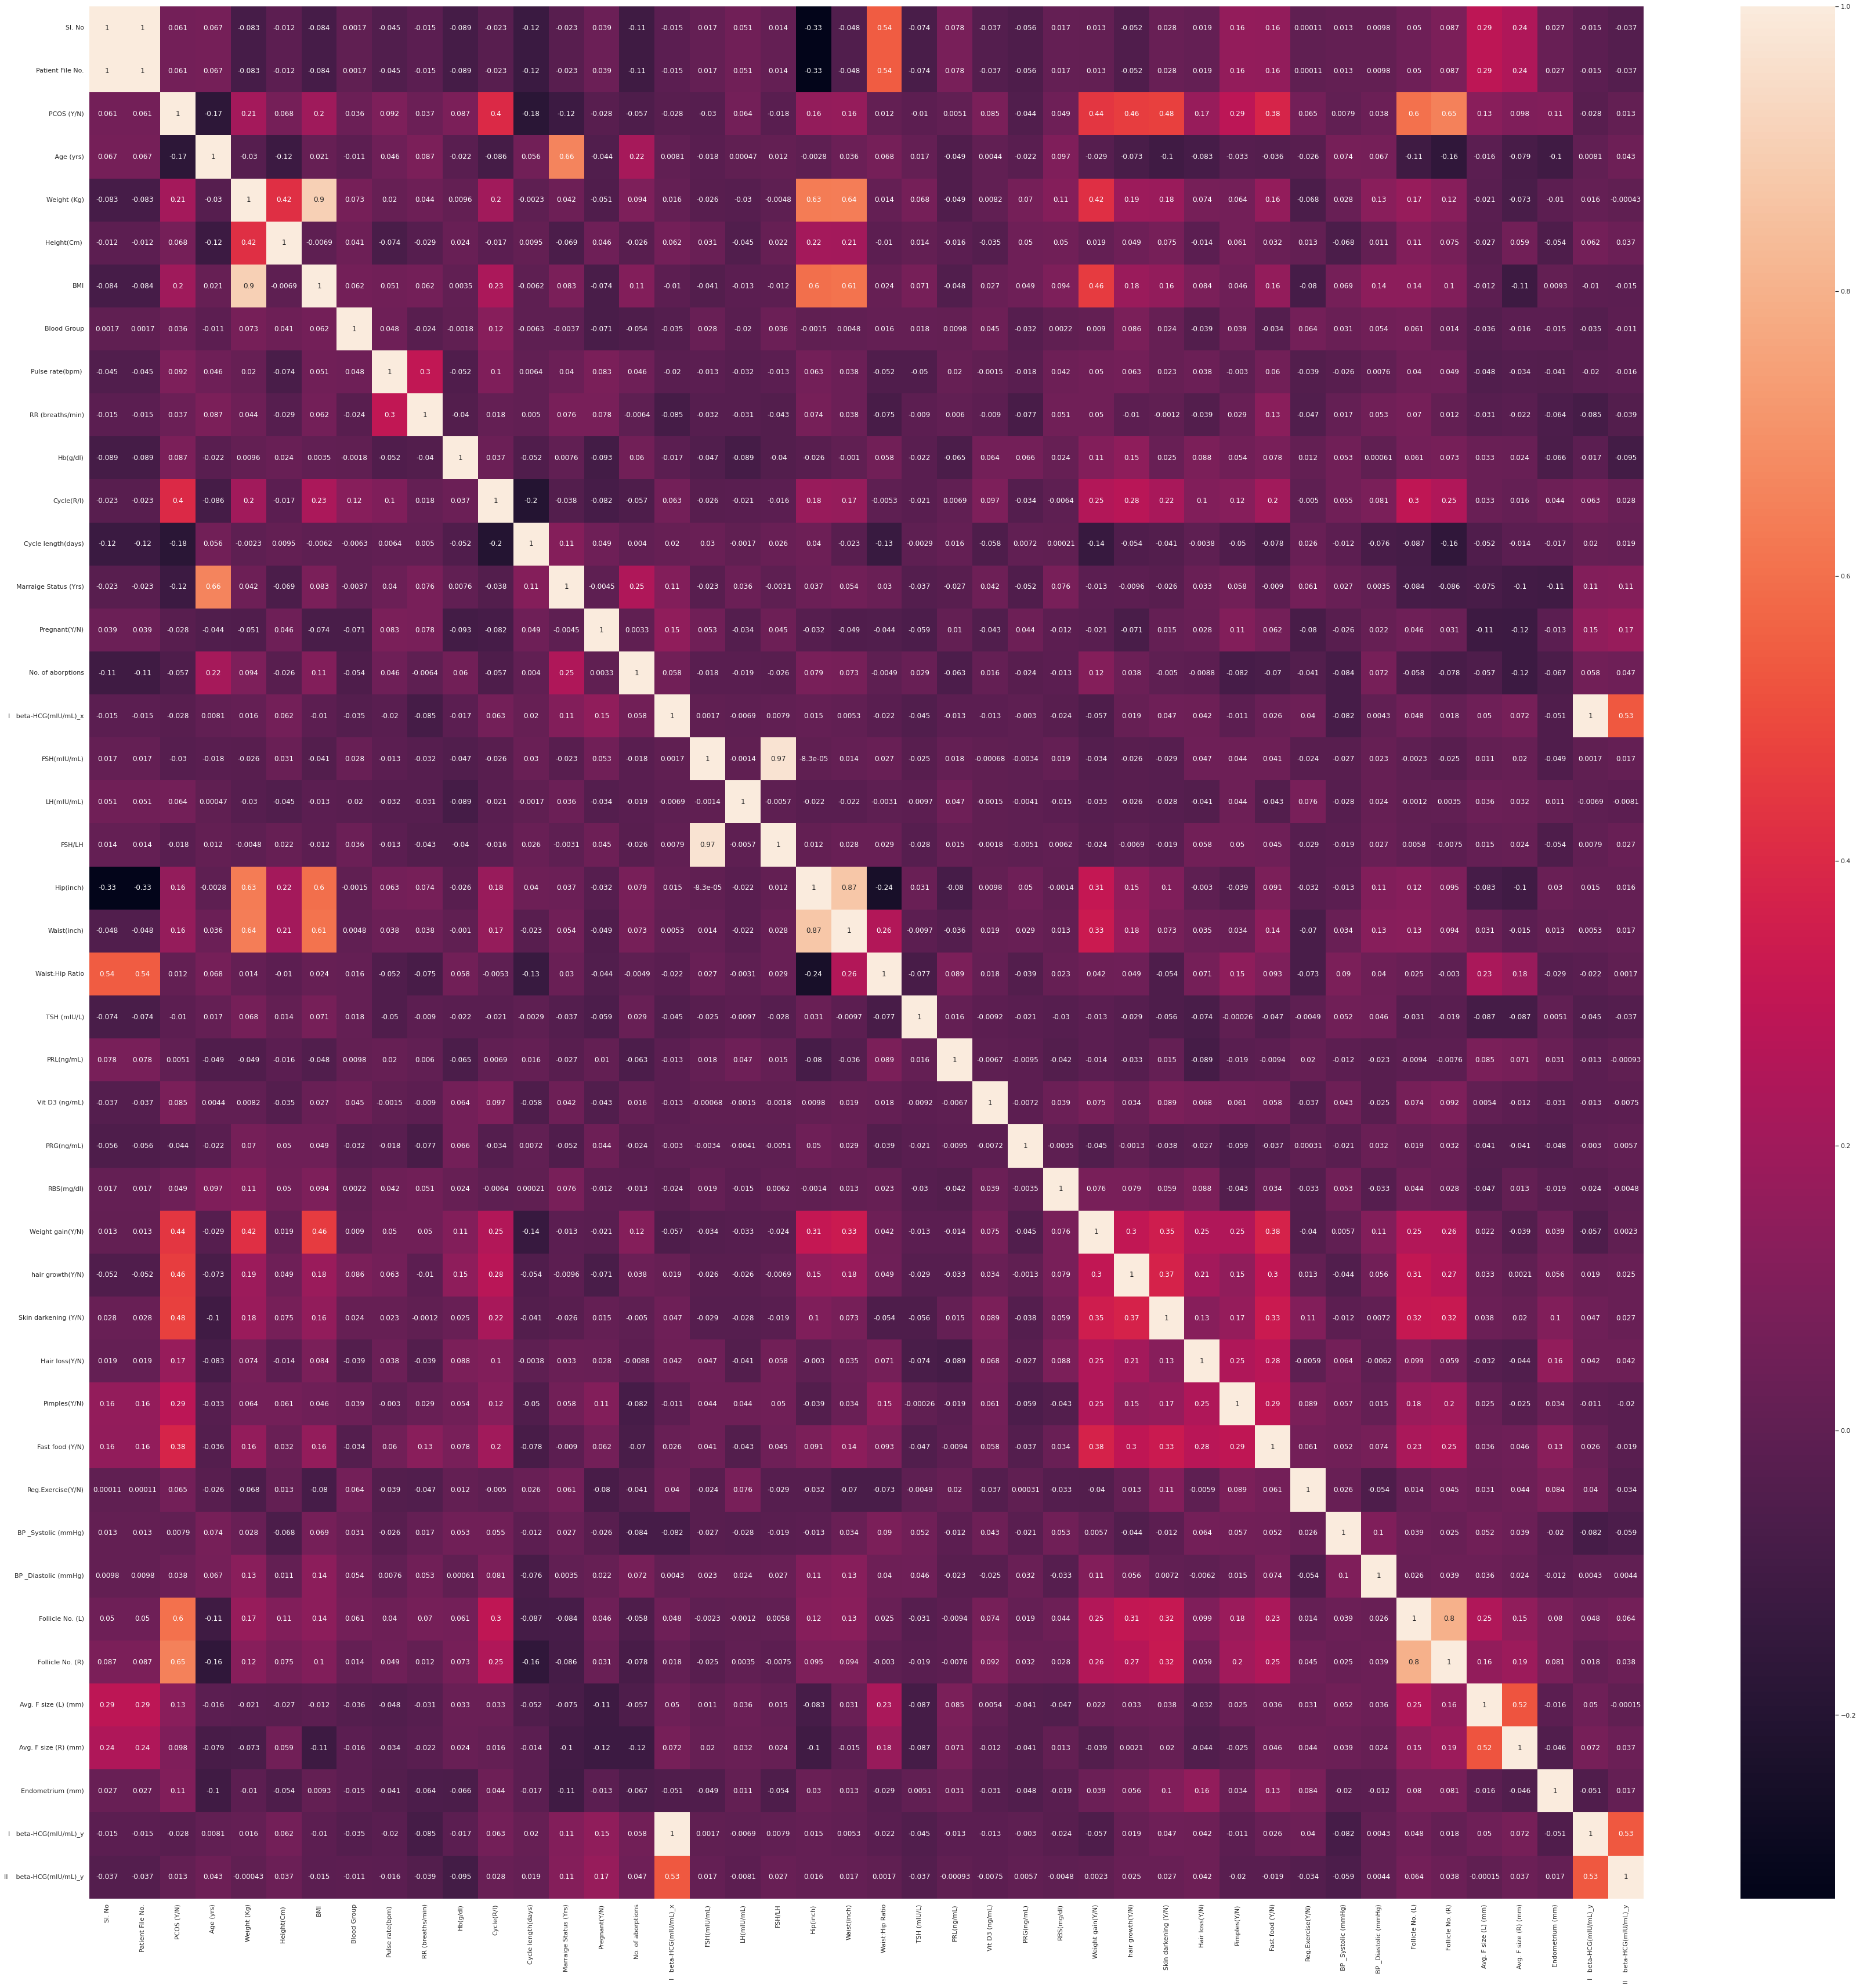

In [48]:

sns.heatmap(data.corr('pearson'), annot =True )
sns.set(rc = {'figure.figsize':(70,70)})#<--responsible for changing the size of a seaborn plot
plt.show()

A heatmap shows us the relation between columns. A higher number means that the columns have a higher positive correlation with each other (this metric is called the 'pearson coefficient'). This means that an increase in value of one column will directly result in the increase of value in the other column, and vice versa.

By the looks of it. PCOS has a higher positive correlation with Follicle No.(L and R), Skin darkening, hair growth,weight gain and cycle. It has the highest negative correlation with age and cycle length. (see the third row/column if you're confused)

So let us pick seven columns with the highest coefficient and two with the lowest coefficient(with respect to PCOS). We'll be discarding the rest for convenience

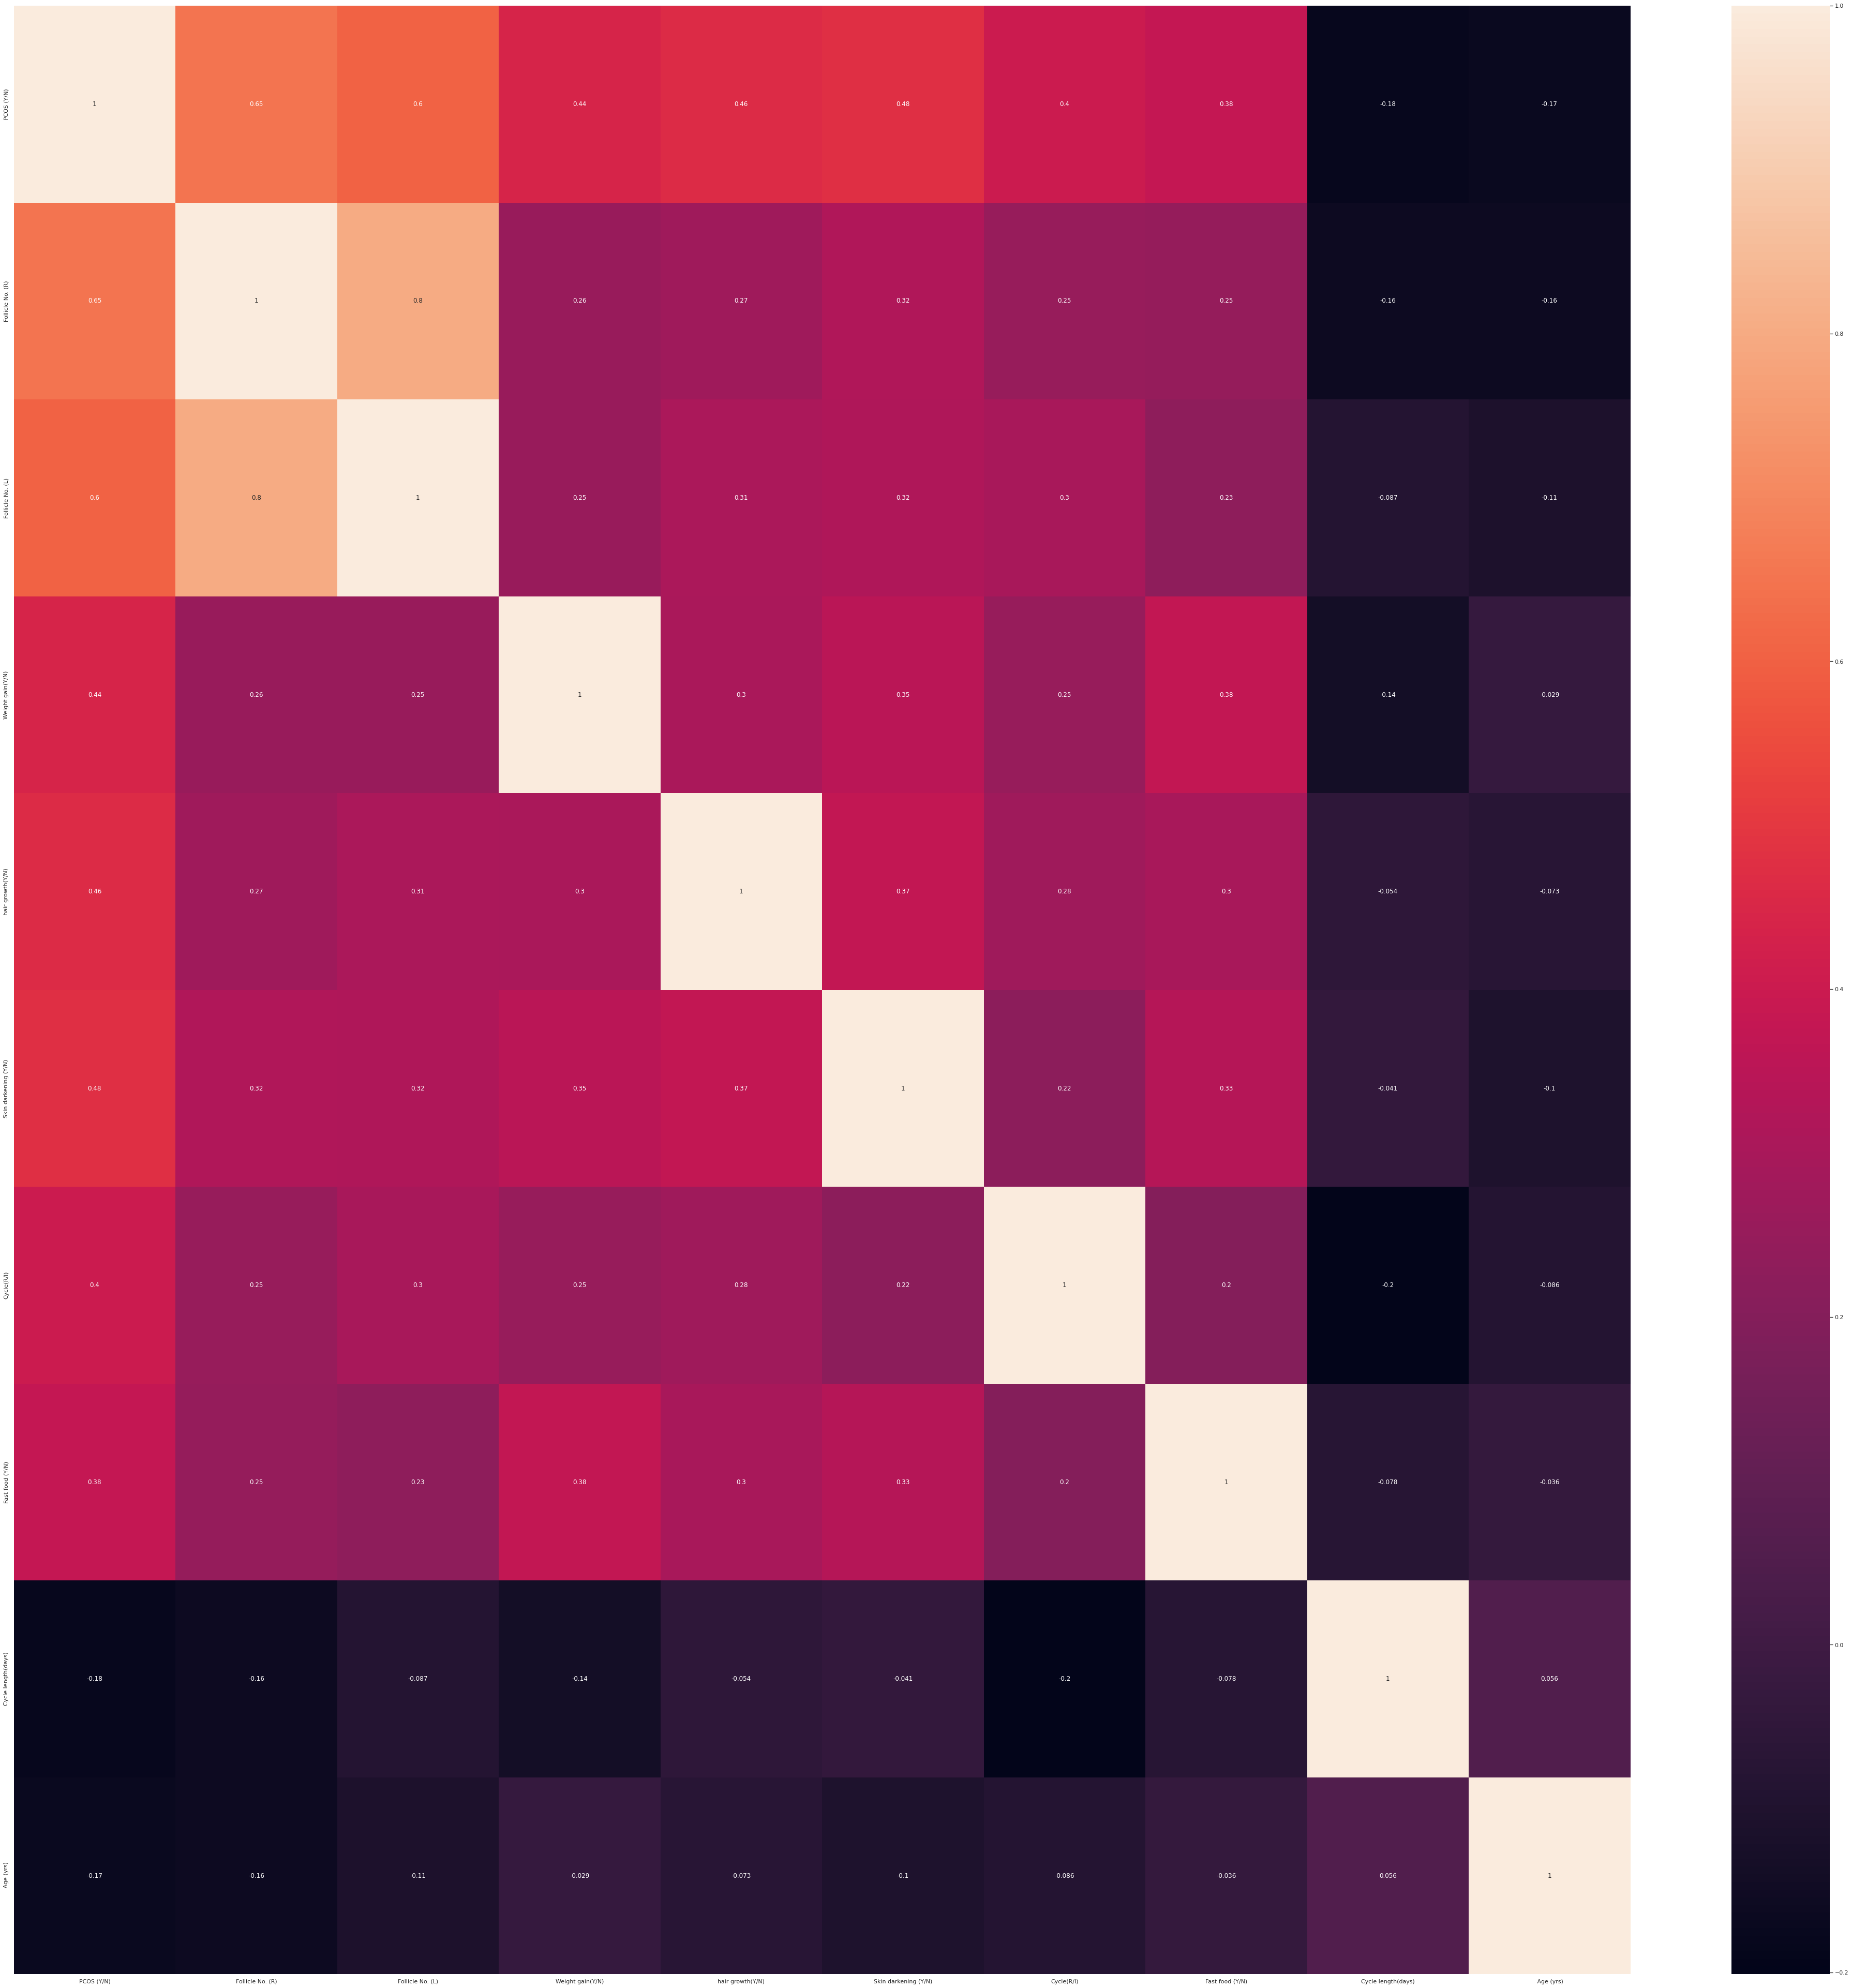

In [11]:
data = data[['PCOS (Y/N)','Follicle No. (R)','Follicle No. (L)','Weight gain(Y/N)','hair growth(Y/N)','Skin darkening (Y/N)','Cycle(R/I)','Fast food (Y/N)','Cycle length(days)',' Age (yrs)']]
sns.heatmap(data.corr('pearson'), annot =True )
sns.set(rc = {'figure.figsize':(60,60)})
plt.show()

In [12]:
#this one is important - we need to make sure our data is balanced enough 
data['PCOS (Y/N)'].value_counts()

0.0    364
1.0    177
Name: PCOS (Y/N), dtype: int64

this is a rather significant imbalance in our data. To get the best results, we need to make sure that there are almost 50% instances of both 0 and 1. In this case, we'll perform random Oversampling

In [32]:
#let us create our training dataset now
X=data.drop(["PCOS (Y/N)"],axis = 1)
y=data["PCOS (Y/N)"]

In [33]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler(sampling_strategy=0.7)
X, y = oversample.fit_resample(X, y)
y.value_counts()

0.0    364
1.0    254
Name: PCOS (Y/N), dtype: int64

much better! let's proceed with the final step

<h1>Step three- Build the solution</h1>
We're almost done now! All that's left is to create our machine learning model, and we can do that easily with scikit-learn.

In [15]:
#here we'll call scikit-learn and other related functions that'll be useful for us
import sklearn
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [34]:
sscaler = MinMaxScaler() #helps us scale the dataset. This makes it easy for the model to train
cols = X.columns
x_scaled = sscaler.fit_transform(X)
X_scaled = pd.DataFrame(x_scaled, columns = cols)
X_scaled

,Follicle No. (R),Follicle No. (L),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Cycle(R/I),Fast food (Y/N),Cycle length(days),Age (yrs)
0,0.15,0.136364,0.0,0.0,0.0,0.000000,1.0,0.416667,0.285714
1,0.25,0.136364,0.0,0.0,0.0,0.000000,0.0,0.416667,0.571429
2,0.75,0.590909,0.0,0.0,0.0,0.000000,1.0,0.416667,0.464286
3,0.10,0.090909,0.0,0.0,0.0,0.000000,0.0,0.416667,0.607143
4,0.20,0.136364,0.0,0.0,0.0,0.000000,0.0,0.416667,0.178571
...,...,...,...,...,...,...,...,...,...
613,0.70,0.727273,0.0,1.0,1.0,0.666667,1.0,0.333333,0.535714
614,0.15,0.045455,1.0,1.0,1.0,0.000000,1.0,0.500000,0.321429
615,0.75,0.727273,1.0,1.0,1.0,0.666667,1.0,0.333333,0.142857
616,0.60,0.500000,1.0,1.0,1.0,0.000000,1.0,0.416667,0.250000


In [35]:
X_scaled_values = X_scaled.to_numpy() #convert the DataFrame to a numpy array
X_scaled_values

array([[0.15      , 0.13636364, 0.        , ..., 1.        , 0.41666667,
        0.28571429],
       [0.25      , 0.13636364, 0.        , ..., 0.        , 0.41666667,
        0.57142857],
       [0.75      , 0.59090909, 0.        , ..., 1.        , 0.41666667,
        0.46428571],
       ...,
       [0.75      , 0.72727273, 1.        , ..., 1.        , 0.33333333,
        0.14285714],
       [0.6       , 0.5       , 1.        , ..., 1.        , 0.41666667,
        0.25      ],
       [0.95      , 0.40909091, 0.        , ..., 0.        , 0.33333333,
        0.35714286]])

In [36]:
X_train,X_test, y_train, y_test = train_test_split(X_scaled , y, test_size=0.2) #creating a training split. We divide the data in a train and a test set respectively

Now we finally create our classification machine learning algorithm
<h2>Classification</h2>
The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups

![classification](https://static.javatpoint.com/tutorial/machine-learning/images/classification-algorithm-in-machine-learning.png)

Let us use some of these algorithms to see which one suits best

In [37]:
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=10) #creates a Random forest model
rfc.fit(X_train, y_train) #trains model on data
pred_rfc = rfc.predict(X_test) #prediction
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.9112903225806451


In [38]:
classi_report = classification_report(y_test, pred_rfc)
print(classi_report)

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93        71
         1.0       0.94      0.85      0.89        53

    accuracy                           0.91       124
   macro avg       0.92      0.90      0.91       124
weighted avg       0.91      0.91      0.91       124



92% is excellent accuracy! But there's still grounds for improvement. Let's try a different classification model 

In [40]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(learning_rate = 0.001, gamma = 0.03, max_depth = 20, subsample = 0.5 )
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.9032258064516129

Now we have two models that give us similar performance over the same dataset. But what if we used them.....together?
<h2>Introduction to Stacking Ensembling</h2>
Stacking or Stacked Generalization is an ensemble machine learning algorithm.

It uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms.

The benefit of stacking is that it can harness the capabilities of a range of well-performing models on a classification or regression task and make predictions that have better performance than any single model in the ensemble.

![Ensemble image](https://miro.medium.com/max/600/1*ZzXwFueV-Beh9MapLgZ5QA.png)

In [41]:
#performing stack ensembling on xgboost and random forest
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=10)
xgb = xgb.XGBClassifier(learning_rate = 0.001, gamma = 0.03, max_depth = 20, subsample = 0.5)
l = [('rf',rfc), ('xgb', xgb)]
from sklearn.ensemble import StackingClassifier
stack_model = StackingClassifier( estimators = l)
score = cross_val_score(stack_model,X_scaled,y,cv = 5,scoring = 'accuracy')

In [42]:
print(score)

[0.90322581 0.85483871 0.90322581 0.93495935 0.85365854]


<h2> Final Performance - 93.5% precision</h2>
And there you have it! We've got an impressive cross validation precision, and we didn't have to do much! It just goes to show that getting into data science and machine learning is super easy!